In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [113]:
#Load train data
train_df = pd.read_csv("EA_train.csv")

In [114]:
#Load test data
test_df = pd.read_csv("EA_test.csv")

In [115]:
train_df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size Company Tenure  \
0  ...                    0        Mid       Medium             89   
1  ...                    3        Mid       Medium             21   
2  ...                    3        Mid       Medium             74   
3  ...                    2        Mid        Small             50   
4  ...                    0     Senior       Medium             68   

   Remote Work Leadership Opportunities Innovation Opportunities  \
0           No                       No                       No   
1           No                       No                       No   
2           No                       No                       No   
3          Yes                       No                       No   
4           No                       No                       No   

   Company Reputation Employee Recognition Attrition  
0           Excellent               Medium    Stayed  
1                Fair                  Low    Stayed  
2                Poor                  Low    Stayed  
3                Good               Medium    Stayed  
4                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [116]:
test_df.head()

Employee ID  Age Gender  Years at Company    Job Role  Monthly Income  \
0        52685   36   Male                13  Healthcare            8029   
1        30585   35   Male                 7   Education            4563   
2        54656   50   Male                 7   Education            5583   
3        33442   58   Male                44       Media            5525   
4        15667   39   Male                24   Education            4604   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent             High            Average                     1   
1              Good             High            Average                     1   
2              Fair             High            Average                     3   
3              Fair        Very High               High                     0   
4              Good             High            Average                     0   

   ... Number of Dependents  Job Level Company Size Company Tenure  \
0  ...                    1        Mid        Large             22   
1  ...                    4      Entry       Medium             27   
2  ...                    2     Senior       Medium             76   
3  ...                    4      Entry       Medium             96   
4  ...                    6        Mid        Large             45   

   Remote Work Leadership Opportunities Innovation Opportunities  \
0           No                       No                       No   
1           No                       No                       No   
2           No                       No                      Yes   
3           No                       No                       No   
4          Yes                       No                       No   

   Company Reputation Employee Recognition Attrition  
0                Poor               Medium    Stayed  
1                Good                 High      Left  
2                Good                  Low    Stayed  
3                Poor                  Low      Left  
4                Good                 High    Stayed  

[5 rows x 24 columns]

In [117]:
train_df.shape

(59598, 24)

In [118]:
test_df.shape

(14900, 24)

In [119]:
#Info of the datasets
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [120]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [121]:
#Checking for missing values
train_df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [122]:
#Checking for missing values
test_df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [123]:
pd.unique(train_df['Company Reputation'])

array(['Excellent', 'Fair', 'Poor', 'Good'], dtype=object)

In [124]:
pd.unique(train_df['Employee Recognition'])

array(['Medium', 'Low', 'High', 'Very High'], dtype=object)

In [125]:
pd.unique(train_df['Attrition'])

array(['Stayed', 'Left'], dtype=object)

In [126]:
pd.unique(train_df['Job Role'])

array(['Education', 'Media', 'Healthcare', 'Technology', 'Finance'],
      dtype=object)

**Data Visualization**

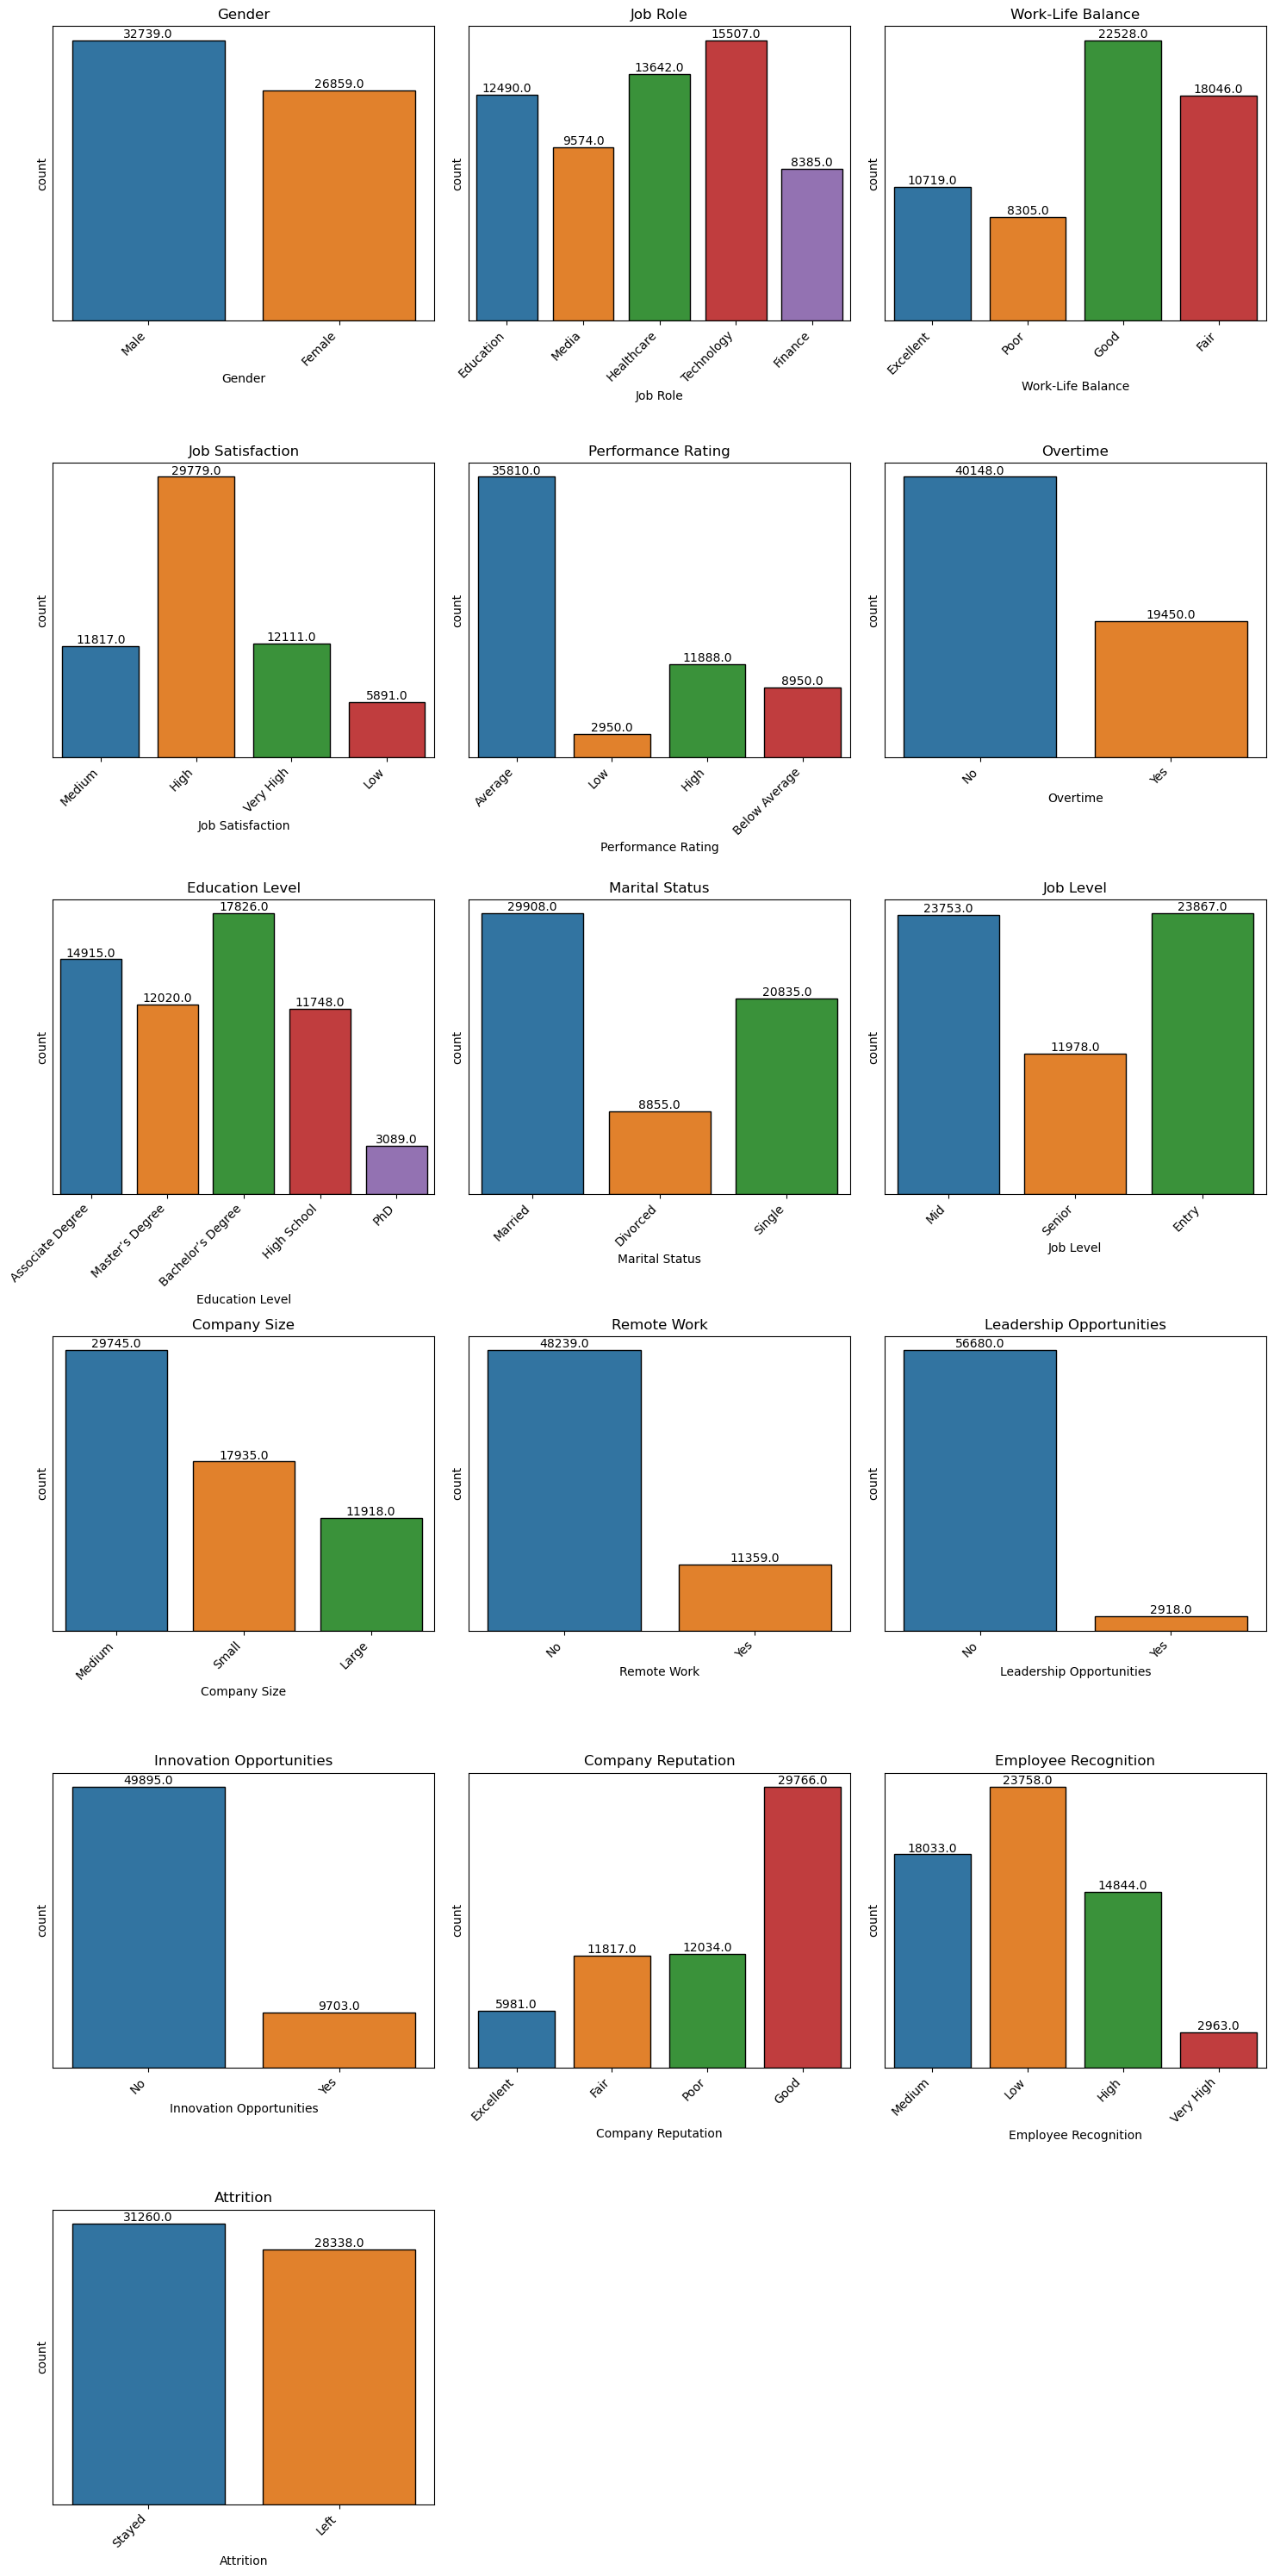

In [102]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
num_cols = len(categorical_columns)

# Determine the grid size
rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)
cols = 3

# Create subplots
plt.figure(figsize=(15, 5 * rows))
for i, column in enumerate(categorical_columns, 1):
    ax = plt.subplot(rows, cols, i)
    sns.countplot(x=column, data=train_df, edgecolor='black', ax=ax)
    # ax.set_ylabel('')  # Remove y-axis label
    ax.set_yticks([])   # Remove y-axis ticks and labels
    plt.title(column)

 # Rotate x-axis labels and adjust font size
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)   

    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0,5), textcoords='offset points')

plt.tight_layout()
plt.show()

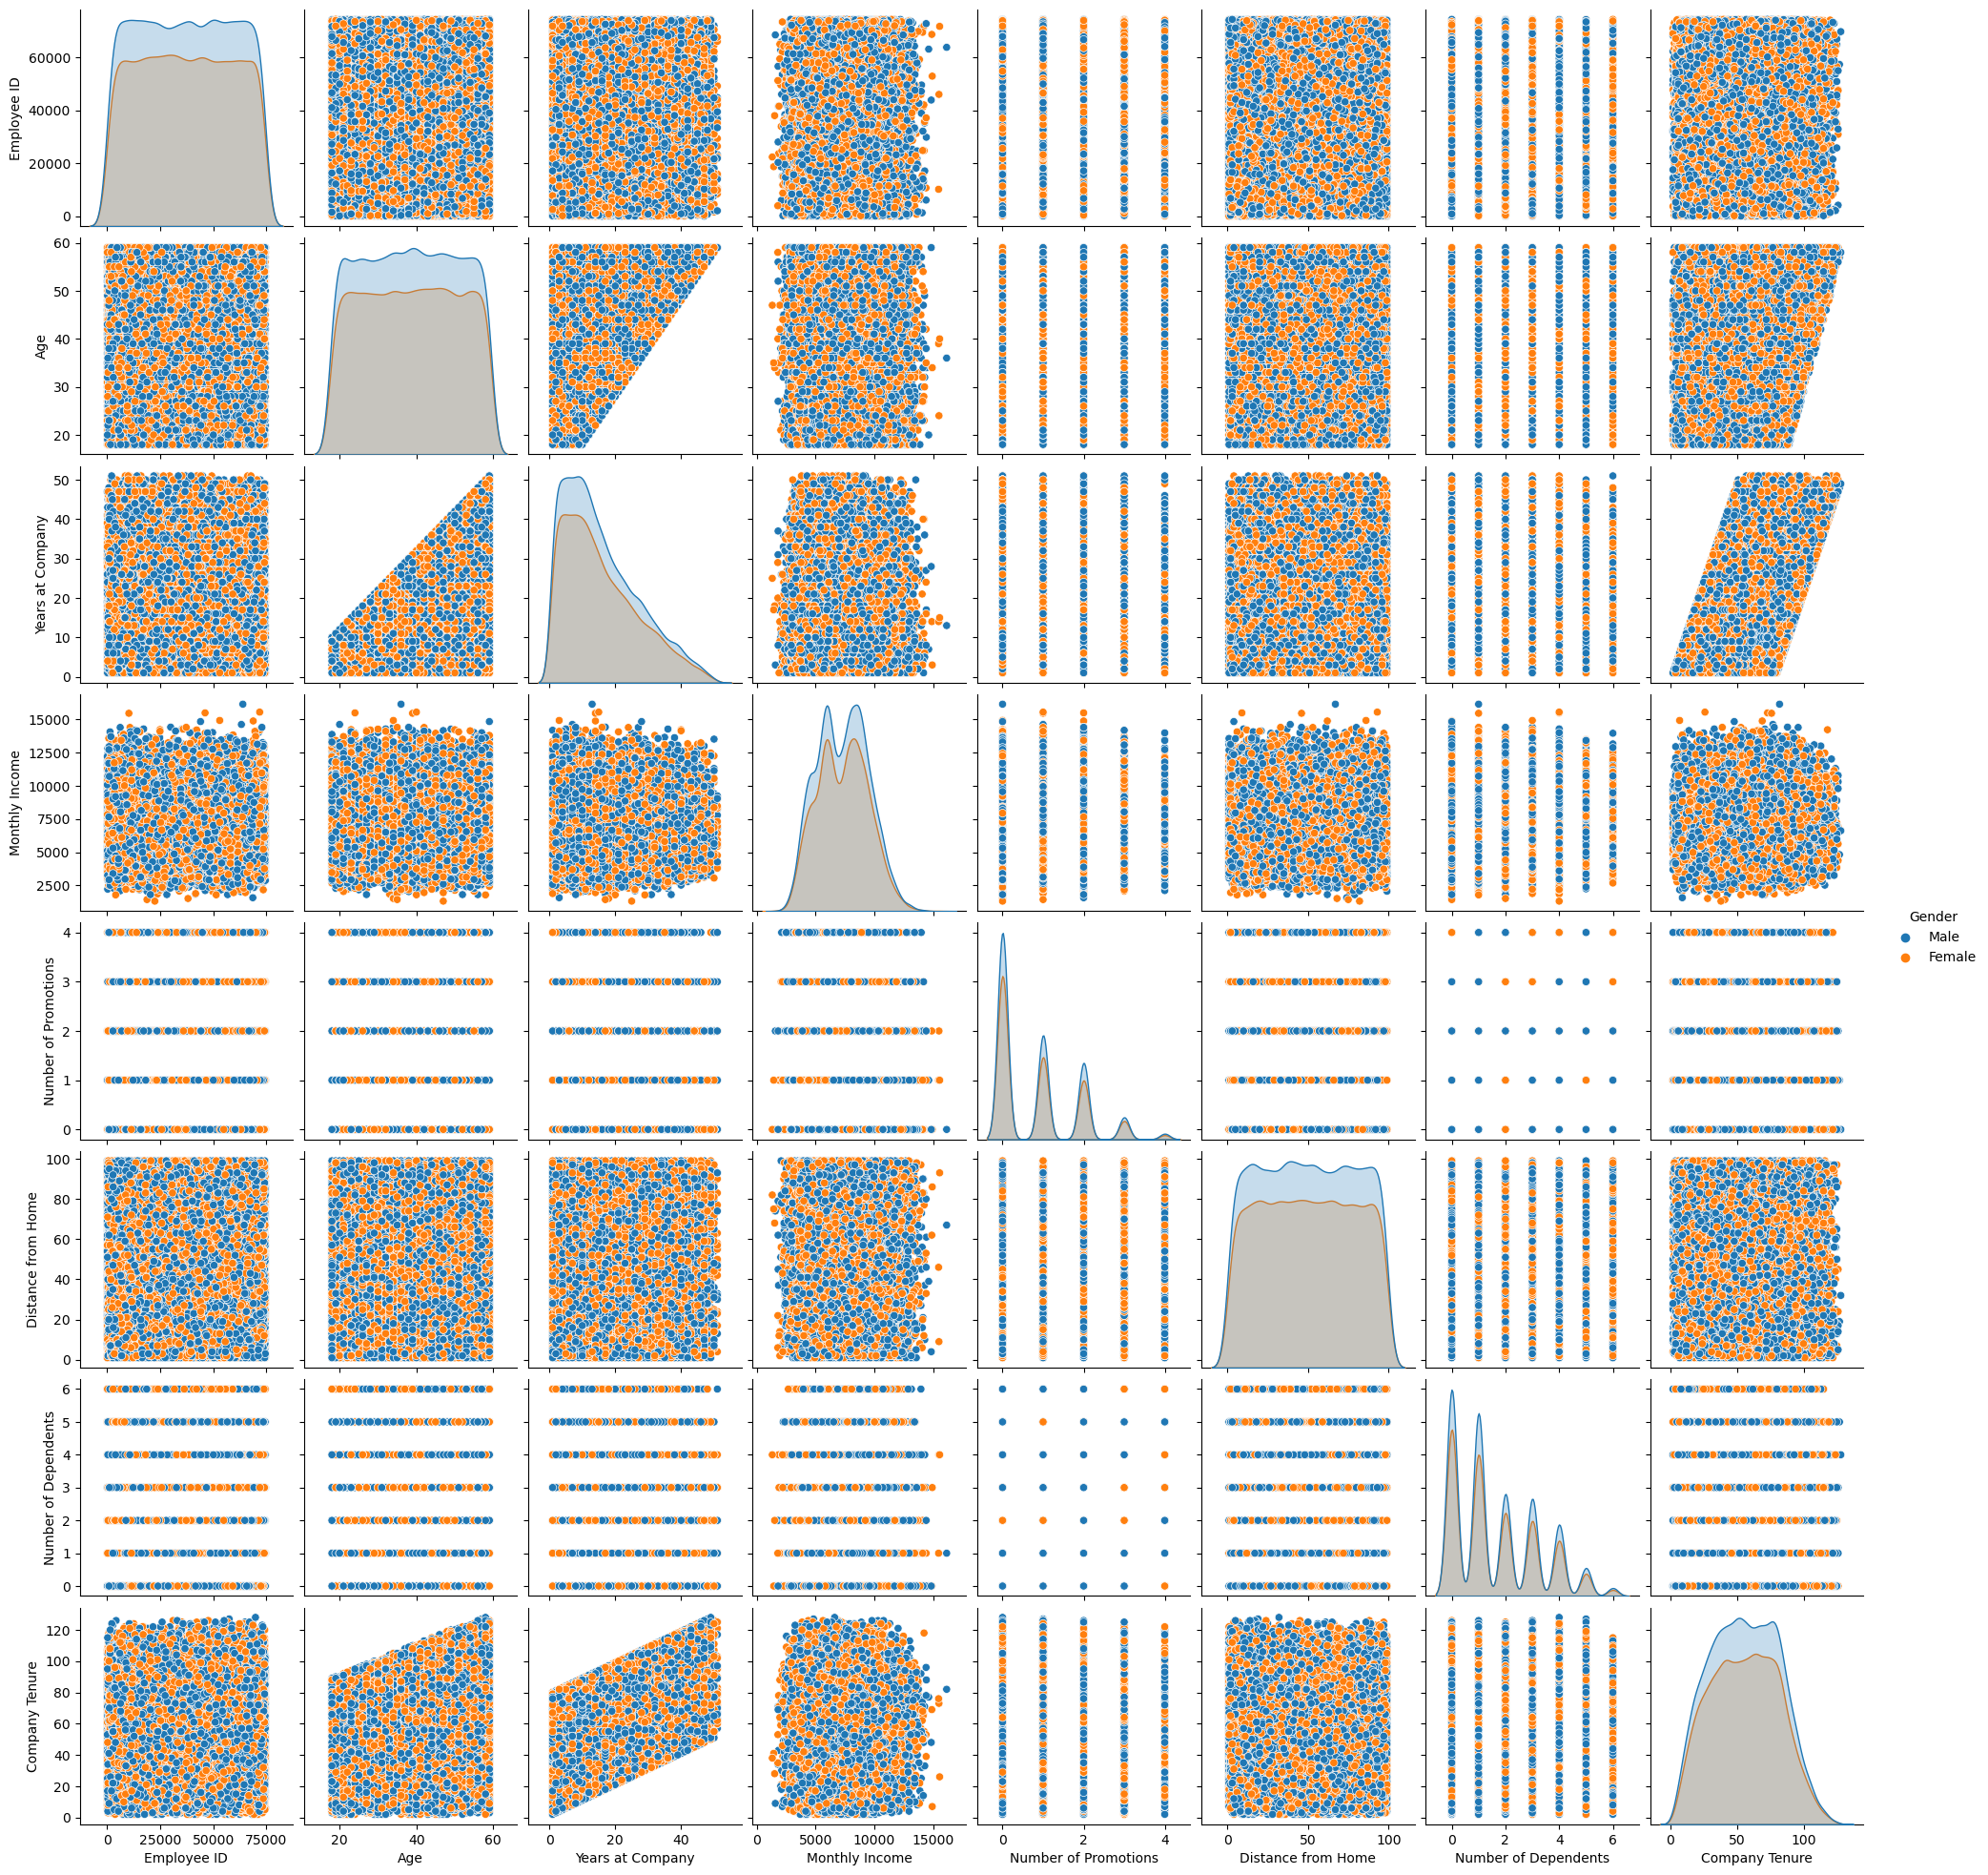

In [103]:

sns.pairplot(train_df, hue = "Gender")
plt.show()

In [127]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

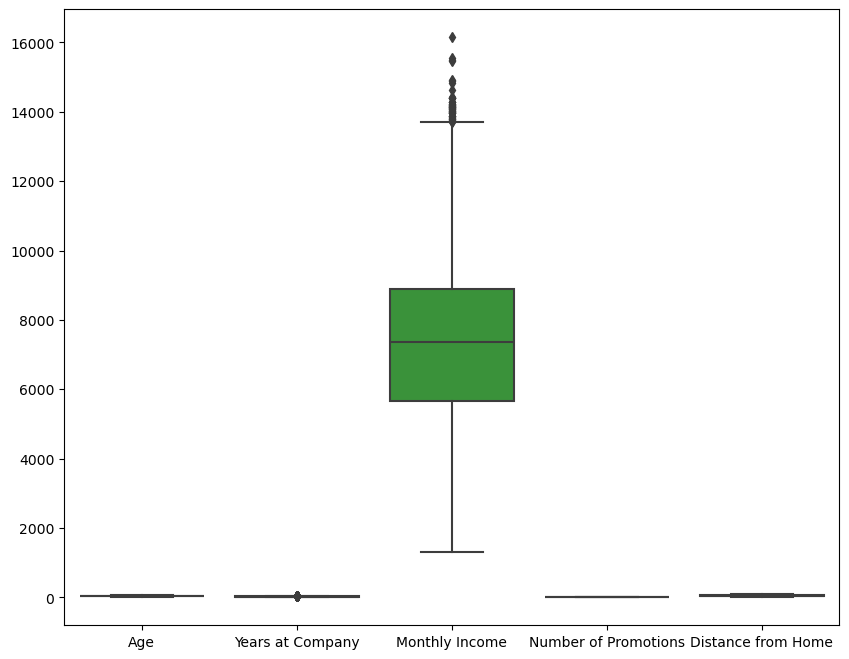

In [105]:
# train_df = train_df.drop(columns=['Employee ID'], axis=0)
# numerical_columns = train_df.select_dtypes(include=['int64']).columns
plt.figure(figsize=(10,8))
numerical_columns = ['Age','Years at Company', 'Monthly Income', 'Number of Promotions','Distance from Home']
sns.boxplot(data=train_df[numerical_columns])
plt.show()

In [106]:
# Function to remove outliers using IQR
def remove_outliers(train_df, columns):
    for col in columns:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    return train_df

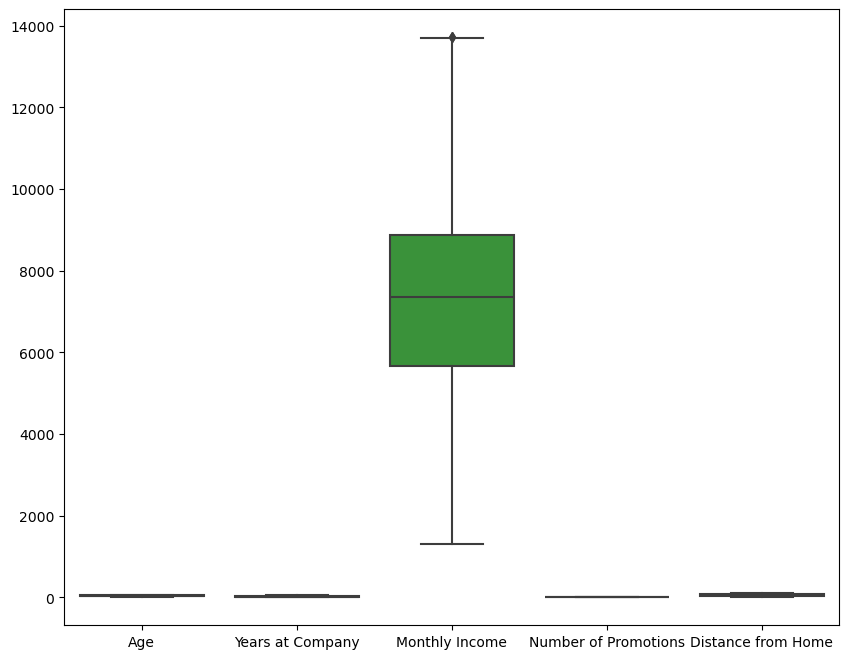

In [107]:
# Remove outliers from specified numerical columns
train_df_cleaned = remove_outliers(train_df, numerical_columns)

# Visualize the cleaned data with a boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=train_df_cleaned[numerical_columns])
plt.show()

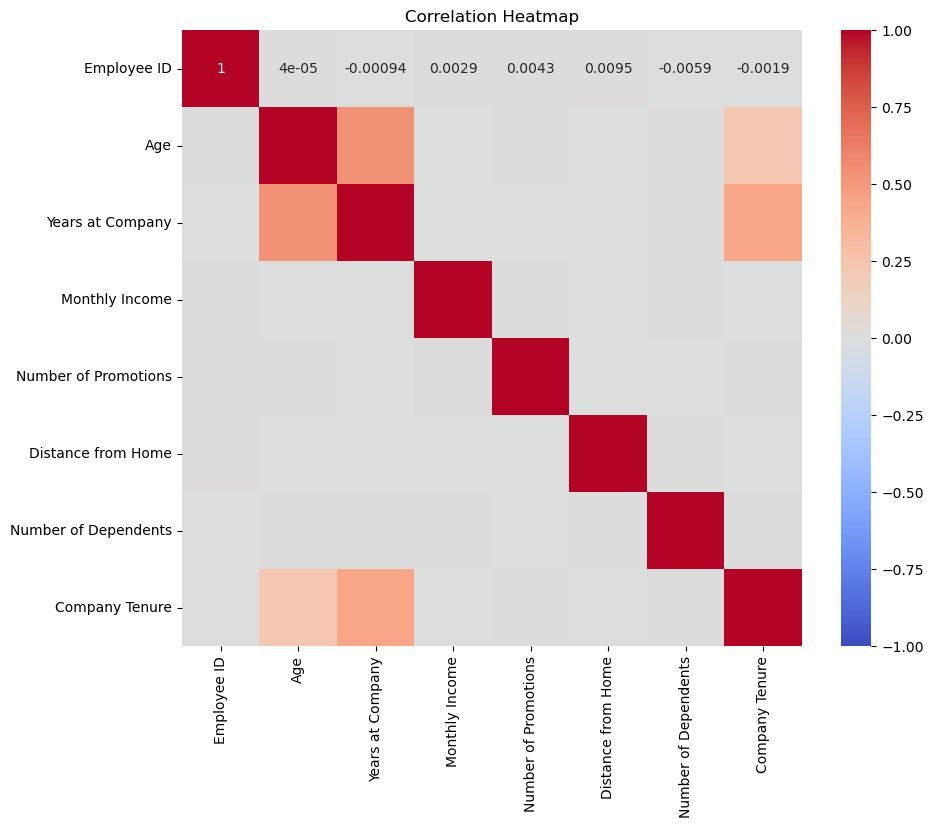

In [108]:
# Select only numeric columns
numeric_columns = train_df_cleaned.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = train_df_cleaned[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [129]:
le = LabelEncoder()
# apply label encoder for each categorical column
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = le.fit_transform(train_df[col])

# apply label encoder for each categorical column
for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col] = le.fit_transform(test_df[col])

In [130]:
X_train = train_df.drop('Attrition', axis = 1)
y_train = train_df['Attrition']

X_test = test_df.drop('Attrition' , axis=1)
y_test = test_df['Attrition']

**Training with Radom Forest Model**

In [131]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

#next, we predict on the test set and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7487919463087248


**Training with Logistic Regression Model**

In [133]:
logReg = LogisticRegression(max_iter=1000)
logReg.fit(X_train, y_train) 

# make predictions
lr_pred = logReg.predict(X_test)

# evaluate the model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
print(f"Logistic Regression accuracy: {lr_accuracy}")
print(f"Confusion Matrix:\n{lr_conf_matrix}")

Logistic Regression accuracy: 0.5602684563758389
Confusion Matrix:
[[2940 4092]
 [2460 5408]]


**_After training and evaluating 2 machine learning models on the employee attrition dataset, I compared their performance based on the accuracy of the models. The models evaluated include Logistic Regression and Random Forest_**

_Based on the accuracy score, Random Forest Classifier performs significantly better than the Logistic Regression Model and I recommend using that for predicting employee attrition.
It is essential however to consider the specific context and constraints of the problem. In the case were interpretability is crucial, a simpler model might be preferred._